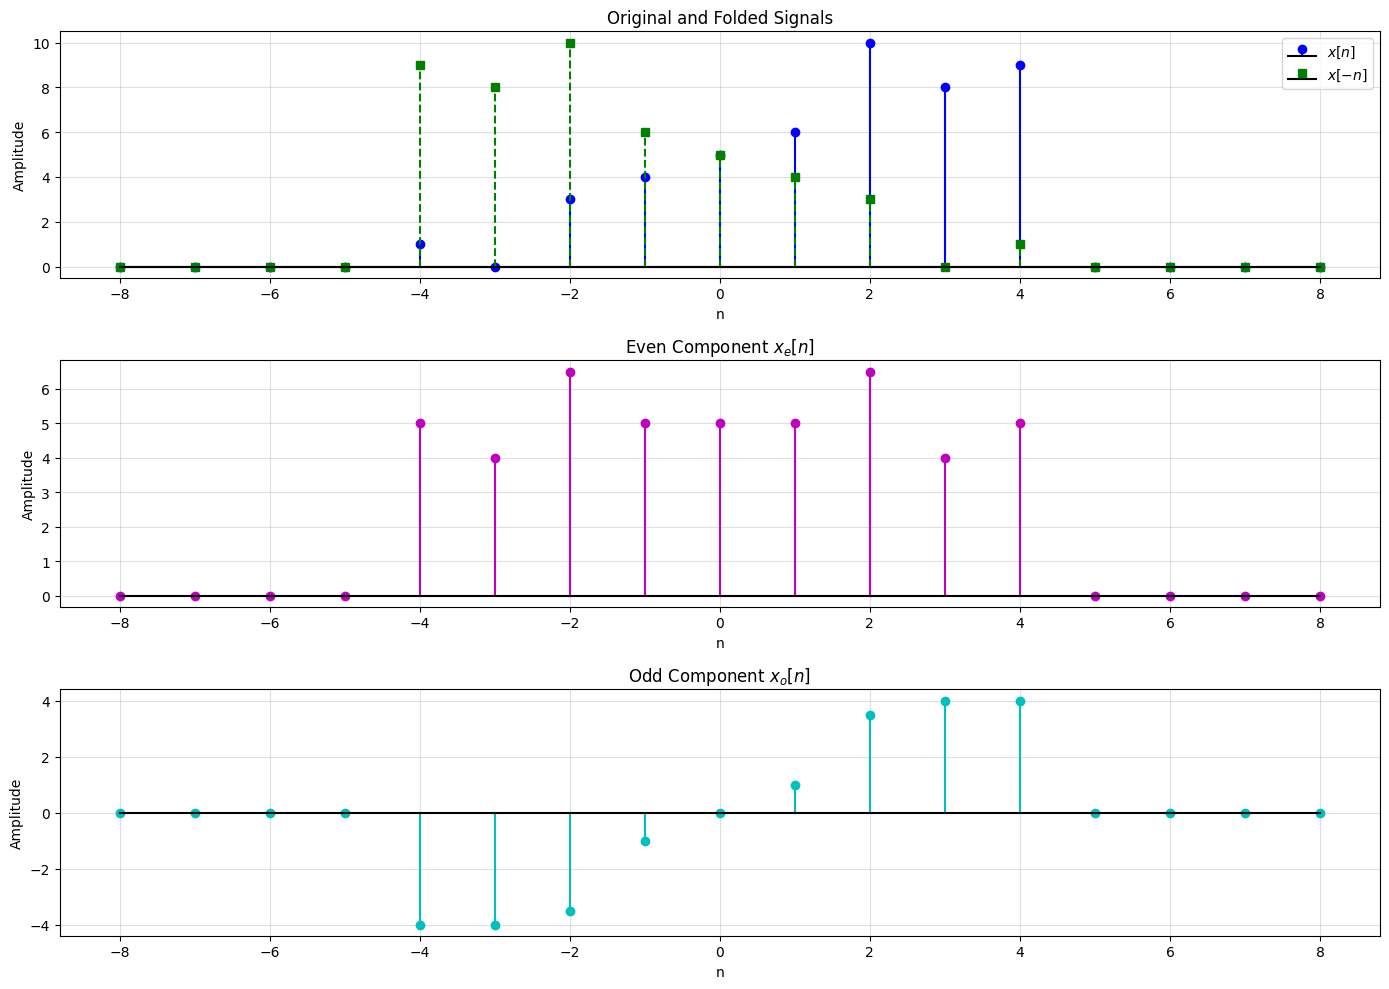

=== Verification ===
Reconstruction error: 0.00e+00
Even part symmetric? True
Odd part antisymmetric? True


In [1]:
"""
Alternative Design:
Decomposition of a Discrete-Time Signal into Even and Odd Parts

This script provides an alternative approach to analyzing a signal by:
    1. Generating a custom asymmetric sequence
    2. Performing time-reversal explicitly with index mapping
    3. Deriving even and odd components
    4. Plotting results in a layered style (original vs components)
    5. Validating reconstruction and symmetry properties
"""

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1. Construct a discrete-time signal
# -------------------------------------------------------------------
n = np.arange(-8, 9)                       # Time axis from -8 to 8
x = np.zeros_like(n, dtype=float)

# Custom asymmetric signal: ramp + impulse modification
x[(n >= -4) & (n <= 4)] = n[(n >= -4) & (n <= 4)] + 5
x[n == 2] += 3     # impulse-like modification at n=2
x[n == -3] -= 2    # dip at n=-3

# -------------------------------------------------------------------
# 2. Time reversal (folding)
# -------------------------------------------------------------------
# Instead of simple reversal, map indices explicitly
n_folded = -n
x_folded = np.array([x[np.where(n == -k)][0] for k in n])

# -------------------------------------------------------------------
# 3. Even and odd component decomposition
# -------------------------------------------------------------------
x_even = 0.5 * (x + x_folded)
x_odd  = 0.5 * (x - x_folded)

# -------------------------------------------------------------------
# 4. Visualization
# -------------------------------------------------------------------
plt.figure(figsize=(14, 10))

# Original signal with folded overlay
plt.subplot(3, 1, 1)
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt='k-',
         label="$x[n]$")
plt.stem(n, x_folded, linefmt='g--', markerfmt='gs', basefmt='k-',
         label="$x[-n]$")
plt.title("Original and Folded Signals")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True, alpha=0.4)

# Even component
plt.subplot(3, 1, 2)
plt.stem(n, x_even, linefmt='m-', markerfmt='mo', basefmt='k-')
plt.title("Even Component $x_e[n]$")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.4)

# Odd component
plt.subplot(3, 1, 3)
plt.stem(n, x_odd, linefmt='c-', markerfmt='co', basefmt='k-')
plt.title("Odd Component $x_o[n]$")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 5. Verification
# -------------------------------------------------------------------
x_reconstructed = x_even + x_odd
error = np.max(np.abs(x - x_reconstructed))

print("=== Verification ===")
print(f"Reconstruction error: {error:.2e}")
print(f"Even part symmetric? {np.allclose(x_even, x_even[::-1])}")
print(f"Odd part antisymmetric? {np.allclose(x_odd, -x_odd[::-1])}")
